# BigMac Index

The Big Mac Index is a price index published since 1986 by The Economist as an informal way of measuring the purchasing power parity (PPP) between two currencies and providing a test of the extent to which market exchange rates result in goods costing the same in different countries. It "seeks to make exchange-rate theory a bit more digestible. The index compares the relative price worldwide to purchase the Big Mac, a hamburger sold at McDonald's restaurants. (source: https://en.wikipedia.org/wiki/Big_Mac_Index)

This notebook will dive deeper in this index and tries to perform a deepdive on the values for several countries. Trying to answer the following research questions:
- Do Big Mac prices serve as a proper exchange rate indicator?
- Which countries have, based on the Big Mac Index, more purchasing power? (compared to the US)
- Which countries have, based on the Big Mac Index, less purchasing power? (compared to the US)


Furthermore, as the Big Mac index is used a comparison between countries, the question arised if the price can also be compared to country specific price-indicators. Therefore the local big mac prices have been compared to the Consumper Price Index (CPI) of a country, with the attempt to answer the following research question:

- Does local BigMac price development follow a similar trend as a country's CPI?

Datasets used: 
- BigMacPrice --> https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice?resource=download
- CPI: https://data.oecd.org/price/inflation-cpi.htm

*For more insight on how the dataset "BigMacPrices_cleaned" is created, please check the "BigMacPrice - Clean" notebook in the same repo.*

# Load data + packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_pickle('BigMacPrices_cleaned')
df.head()

,date,currency_code,name,local_price,dollar_ex_adjusted,CPI_IDX2015,local_price_usa,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff
1,2000-04-01,AUD,Australia,2.59,1.66,NaN,2.24,3.71,-1.12,1.56,-0.68,-30.36
3,2000-04-01,GBP,Britain,1.90,0.63,73.30,2.24,1.40,0.50,3.03,0.79,35.27
4,2000-04-01,CAD,Canada,2.85,1.45,74.66,2.24,3.25,-0.40,1.96,-0.28,-12.50
7,2000-04-01,CZK,Czech Republic,54.37,37.92,NaN,2.24,84.94,-30.57,1.43,-0.81,-36.16
8,2000-04-01,DKK,Denmark,24.75,7.79,76.01,2.24,17.46,7.29,3.18,0.94,41.96


# Create function for plots 

In [2]:
def plot_graph_country(df, country):
    """
    Function that creates graph that shows the following data over time:
    - The Big Mac Price in the local currency of the country
    - Big Mac Price converted to Dollar of the Country
    - Big Mac Price in the USD
    
    Args:
    df: DataFrame with BigMac Prices and exchange rates
    country: Name of the country to plot for
    
    Output:
    Line Graph with 3 trendlines
    """
    plot_df = df[df.name == country]
    plot_df = plot_df.set_index('date')

    # More versatile wrapper
    fig, host = plt.subplots(figsize=(8,6))

    par1 = host.twinx()

    host.set_xlabel("Date")
    host.set_ylabel("Local Price")
    par1.set_ylabel("Dollar Price")


    p1, = host.plot(plot_df.index, plot_df.local_price, label="Local Price (Local Currency)", color='red')
    p2, = par1.plot(plot_df.index, plot_df.dollar_price_adjusted, label=f"Dollar Price {country}", color = 'green')
    p3, = par1.plot(plot_df.index, plot_df.local_price_usa, label="Dollar Price USD", color = 'blue')

    lns = [p1,
           p2,
           p3
          ]
    host.legend(handles=lns, loc='best')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()
    plt.title(f'Price flow for {country}')
    plt.plot()

# Average Price Difference over full time period

If we look at the average difference between the expected price (converted to dollars) per country and the actual price in the US, we notice there are 2 clear outliers, namely Venezuela and Lebanon. Let's have a closer look at them.

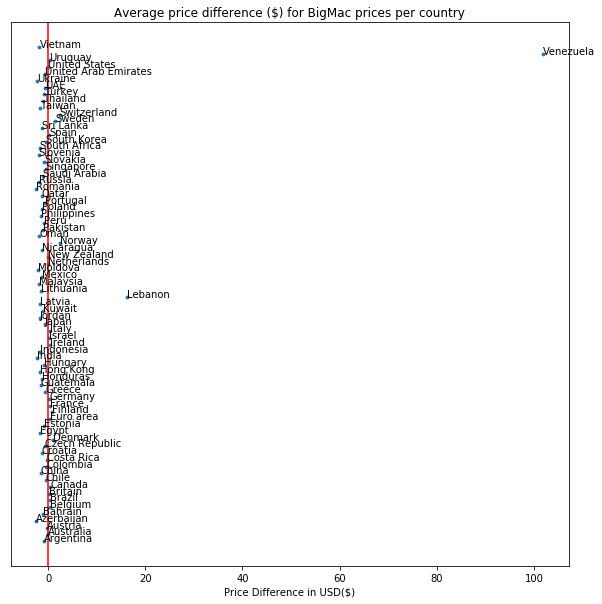

In [3]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df[['diff_dollar', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_dollar', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r', label='Expected price difference')
plt.xlabel('Price Difference in USD($)')
plt.title('Average price difference ($) for BigMac prices per country')
ax.set_yticks([])
ax.scatter(x, y, s=8)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]), size=10)

# What happened in Venezuela and Lebanon?

If we check how the price of big mac in combination with the exchange rates developed in both countries, we see a huge spike in local prices, while the exchange rate took some time to adjust for it and get the dollar converted prices closer to the USD price.

After some research the conclusion can be drawn that for both countries this is due to some financial distress resulting in hyperinflation.
Links: 
- Lebanon: https://atalayar.com/en/content/lebanons-hyperinflation-continues-drive-purchasing-costs
- Venezuela: https://www.pbs.org/wgbh/frontline/article/timeline-how-the-crisis-in-venezuela-unfolded/

Besides, Venezuela does not seem to have price data for the period of 2018-2020, while introducing a new currency in 2021.
Even after the introduction of this new currency the price for big macs started of very unstable, starting from a price of over 16mln VES in july 2021 to only 23 VES in january 2022. 

Given this financial instability for both countries, they do not seem to be good indicators for Big Mac Prices in combination with exchange rates and are therefore dropped from the sample
        

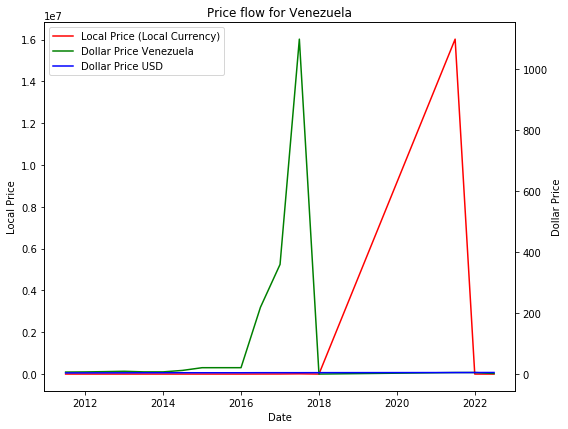

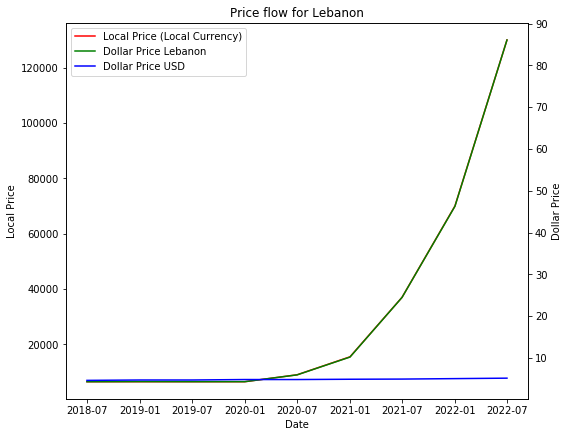

In [4]:
plot_graph_country(df, 'Venezuela')
plot_graph_country(df, 'Lebanon')

In [5]:
df[df.name == "Venezuela"][['date', 'currency_code', 'name', 'local_price',
                            'dollar_ex_adjusted', 'local_price_usa', 'dollar_price_adjusted']]

,date,currency_code,name,local_price,dollar_ex_adjusted,local_price_usa,dollar_price_adjusted
574,2011-07-01,VEF,Venezuela,28.00,4.30,3.64,6.51
629,2012-01-01,VEF,Venezuela,30.00,4.29,3.81,7.00
682,2012-07-01,VEF,Venezuela,34.00,4.29,3.96,7.93
737,2013-01-01,VEF,Venezuela,39.00,4.29,4.03,9.09
792,2013-07-01,VEF,Venezuela,45.00,6.29,4.18,7.16
848,2014-01-01,VEF,Venezuela,45.00,6.29,4.24,7.16
904,2014-07-01,VEF,Venezuela,75.00,6.29,4.29,11.93
960,2015-01-01,VEF,Venezuela,132.00,6.34,4.29,20.83
1016,2015-07-01,VEF,Venezuela,132.00,6.32,4.29,20.88
1072,2016-01-01,VEF,Venezuela,132.00,6.33,4.29,20.86


In [6]:
df[df.name == "Lebanon"][['date', 'currency_code', 'name', 'local_price',
                          'dollar_ex_adjusted', 'local_price_usa', 'dollar_price_adjusted']]

,date,currency_code,name,local_price,dollar_ex_adjusted,local_price_usa,dollar_price_adjusted
1334,2018-07-01,LBP,Lebanon,6500.00,1510.85,4.62,4.30
1406,2019-01-01,LBP,Lebanon,6500.00,1500.91,4.71,4.33
1478,2019-07-01,LBP,Lebanon,6500.00,1507.26,4.71,4.31
1550,2020-01-01,LBP,Lebanon,6500.00,1507.89,4.82,4.31
1622,2020-07-01,LBP,Lebanon,9000.00,1515.41,4.82,5.94
1694,2021-01-01,LBP,Lebanon,15500.00,1519.51,4.89,10.20
1766,2021-07-01,LBP,Lebanon,37000.00,1512.30,4.93,24.47
1839,2022-01-01,LBP,Lebanon,70000.00,1512.71,5.04,46.27
1911,2022-07-01,LBP,Lebanon,130000.00,1510.53,5.15,86.06


In [7]:
exclude = ['Venezuela', 'Lebanon']
df = df[~df.name.isin(exclude)]

# Average price difference after excluding Lebanon and Venezuela

After excluding both outliers and checking again for the average price difference in big mac prices per country in relation to the USD Big Mac price ranges from -2.8 dollar (Romania / Azerbaijan) to approximately +2.4 (Switzerland / Norway).

If Big Mac prices would be a perfect indication of exchange rates, the price difference would be $0 (see red line in the graph underneath), which is seems, on average, to be the case for The Netherlands, Australia and New Zealand.

However, in general most countries seem to, on average, have relatively cheaper Big Macs than the US while countries that have more expensive burgers are mostly more developed western countries, like western European and Scandinavian nations. 

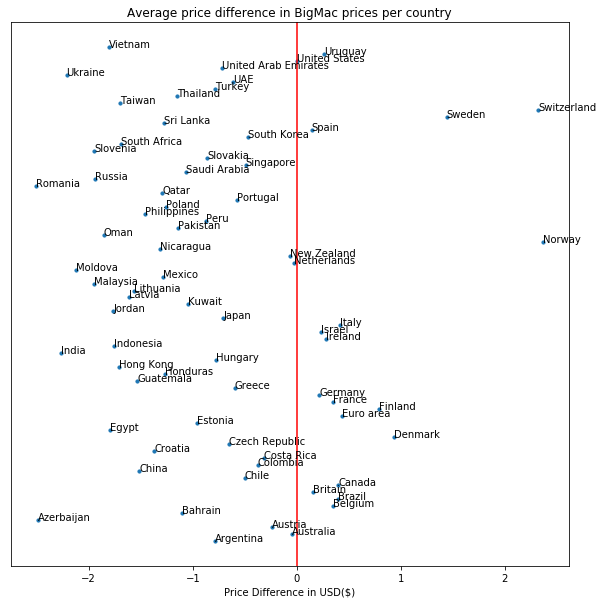

In [8]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df[['diff_dollar', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_dollar', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r', label='Expected price difference')
plt.xlabel('Price Difference in USD($)')
plt.title('Average price difference in BigMac prices per country')
ax.set_yticks([])
ax.scatter(x, y, s=10)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]), size=10)

# Price graphs relatively expensive Big Mac

If we check the pricegraphs for the countries that on average deviate the most from the USD price, we see that for Switzerland and Norway the dollar price is larger (Green line) than the price in the US (Blue line), at some points in time it is almost double the price of the US-big mac price (e.g. Norway ~2008).

This indicates that for these countries the purchasing power is less than in the US, for exampe, on 1-1-2020 you could buy 10 big macs for around 48 USD, while you would've needed around 63 USD in Norway and 67 USD in Switzerland to buy the same amount of burgers.

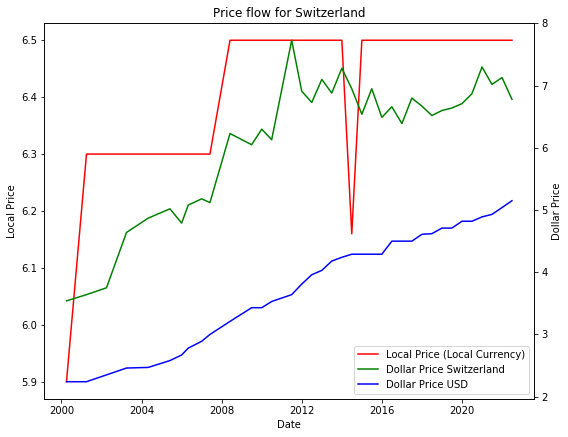

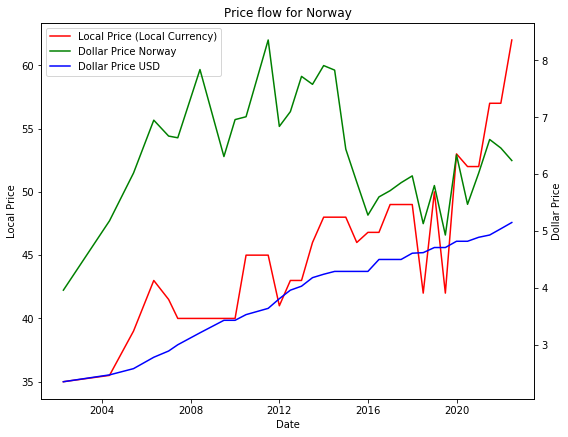

In [9]:
plot_graph_country(df, 'Switzerland')
plot_graph_country(df, 'Norway')


# Price graphs relatively cheap Big Macs

When checking the price-graphs for countries on the other end of the spectrum, we see an opposite trend as for Norway and Switzerland, where in Azerbaijan and Romania the Local dollar price (green) seems to be around half of the dollar price in the US (blue). 
Also, despite that the Big Mac prices in the local currency seems to gradually increase for those countries, the dollar exchange rate corrects for it, keeping the dollar price around the same level.

This indicates that for these countries the purchasing power is higher than in the US, for exampe, on 1-1-2022 you could buy 10 big macs for around 50 USD, while you would've needed only around 27 USD in Azerbaijan and 24 USD in Romania to buy the same amount of burgers.

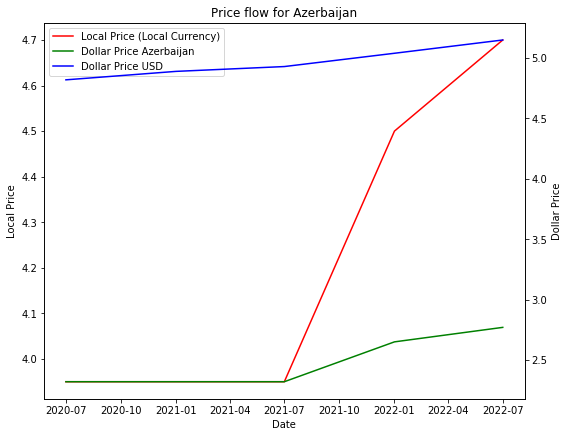

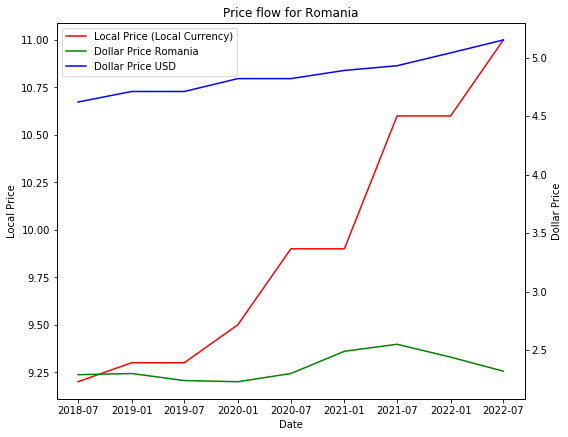

In [10]:
plot_graph_country(df, 'Azerbaijan')
plot_graph_country(df, 'Romania')

# Do local Big Mac Prices follow the same pattern as the CPI?

The Big Mac Index is used to compare exchange rates between different countries, but could they also be used as a measure to look at the price level of an individual country?

Therefore the Consumer Price Index (CPI), which is an index that looks at the average price-level of consumer goods in a country, has been compared to the local prices of the big macs.

Because https://data.oecd.org/price/inflation-cpi.htm did not have CPI-data for all the countries in the dataset, only those with CPI data have been been included in the dataset.

In [11]:
cols = ['date', 'currency_code', 'name', 'local_price', 'CPI_IDX2015']

df_cpi = df[~df.CPI_IDX2015.isnull()][cols]
df_cpi.head()

,date,currency_code,name,local_price,CPI_IDX2015
3,2000-04-01,GBP,Britain,1.90,73.30
4,2000-04-01,CAD,Canada,2.85,74.66
8,2000-04-01,DKK,Denmark,24.75,76.01
11,2000-04-01,HUF,Hungary,339.00,51.15
14,2000-04-01,JPY,Japan,294.00,99.26


# Create CPI Base for the Big Mac Prices
Because the CPI-index used in this analyses uses the average of 2015 as the base year (hence CPI=100), a similar metric has to be created for the big mac prices. As there are only 2 datapoints per year (one on the first of january, and one the first of july). The base of the big mac prices has been determined by taking the average of the values on 1/1/2015, 1/7/2015 and 1/1/2016.

The big mac price (local currency), can then be compared to the average 2015 price in order to determine a Big Mac Price index.


*For convenience and ironical purposes, the index for the Big Mac prices will from now on be referred to as "BMI"*


In [12]:
# Create average price per country for 2015
f1 = df.date >= datetime(2015, 1, 1)
f2 = df.date <= (datetime(2016,1,1))

avg2015 = df[f1&f2][['local_price', 'name']].groupby('name').aggregate([np.mean])
avg2015.columns = ['local_avg2015']

# Join on dataframe and compare CPI vs. Big Mac price index
df_cpi = pd.merge(df_cpi, avg2015, left_on='name', right_index=True)
df_cpi['bmi_idx2015'] = (df_cpi['local_price'] / df_cpi['local_avg2015']) * 100
df_cpi['diff_idx2015'] = df_cpi['bmi_idx2015'] - df_cpi['CPI_IDX2015']
df_cpi.head()

,date,currency_code,name,local_price,CPI_IDX2015,local_avg2015,bmi_idx2015,diff_idx2015
3,2000-04-01,GBP,Britain,1.90,73.30,2.89,65.74,-7.56
31,2001-04-01,GBP,Britain,1.99,74.40,2.89,68.86,-5.54
59,2002-04-01,GBP,Britain,1.99,75.60,2.89,68.86,-6.74
92,2003-04-01,GBP,Britain,1.99,76.80,2.89,68.86,-7.94
124,2004-05-01,GBP,Britain,1.88,77.90,2.89,65.05,-12.85


# How much does it differ on average?
When comparing the average difference between the CPI of a country and the BMI over the full time period. It is noticeable that for most countries the difference falls within a range of approximately -7% to 7%. When comparing individual goods to a country-wide indicator, this does not seem to be that shocking. 

However, again, there's a few outliers showing countries of which the local Big Mac price moved in a different pattern than the CPI. 
Like Colombia and India where the BMI is on average respectively around 17% and 14% higher than the CPI, or Mexico where it is approximately 12% lower, let's dive into those countries some more.

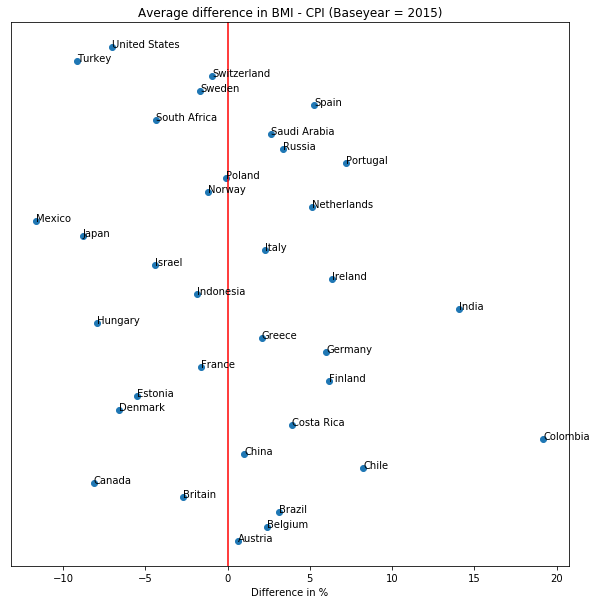

In [13]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df_cpi[['diff_idx2015', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_idx2015', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r')
plt.xlabel('Difference in %')
plt.title('Average difference in BMI - CPI (Baseyear = 2015)')
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]))

# Create function for CPI plot

In [14]:
def cpi_plot(df_cpi, country):
    """
    Function that creates a plot, showing the CPI vs. BMI over time for a country
    
    Args:
    df_cpi: Dataframe with both CPI and BMI information
    country: Name of the country to plot for
    
    Output:
    Line Plot with CPI vs. BMI over time
    """
    plot_df = df_cpi[df_cpi.name == country]
    plot_df = plot_df.set_index('date')

    # More versatile wrapper
    fig, host = plt.subplots(figsize=(6,4)) # (width, height) in inches
    # (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

    plt.xlabel("Date")
    plt.ylabel("CPI")

    p1 = plt.plot(plot_df.index, plot_df.bmi_idx2015, label=f"BMI {country} IDX2015", color = 'green')
    p2 = plt.plot(plot_df.index, plot_df.CPI_IDX2015, label=f"CPI {country} IDX2015", color = 'blue')
    
    plt.legend(loc='best')
    # Adjust spacings w.r.t. figsize
    fig.tight_layout()
    plt.title(f'Price flow for {country}')
    # Best for professional typesetting, e.g. LaTeX
    plt.show()

# Outliers with relatively low BMI

Over the entire time period Turkey and Mexico had on average the biggest difference between the BMI and the CPI, in underneath graphs the development of both metrics have been plotted over the full time period.

**Turkey**


When we look at the graph of Turkey, the first thing that stands out is that plot for both metrics look relatively similar over time. However, when looking more closely, it is noticeable that the y-axis range from around 45 to even over 400. Which indicates that both the BMI and the CPI have almost quadrupled with respect to 2015 (in roughly 7 years!). 

A quick search on inflation in Turkey, shows that they have been experiencing record-breaking inflation rates over the past few years, which are related to the Covid-19 Pandemic, the war in Ukraine and the president's belief that high-interest rates encourage inflation and lead to higher prices. (source: https://www.euronews.com/2022/11/03/annual-inflation-in-turkey-reaches-record-25-year-high-of-855).

However, the local prices for the big mac at first did not seem to increase as fast as the inflation, staying relativeley similar between 2015 and 2020, when the first signs of the high inflation were already noticeable in Turkey's CPI. Nevertheless, from 2021 on the price of the Big Mac also increased strongly here, with an extreme outlier for the most recent observation (1-7-2022), where the price almost doubled with respect to 1-1-2022. So, if this trend holds (for big mac lovers in Turkey's sake, let's hope not), the difference between CPI and BMI might look entirely different in just a few years.

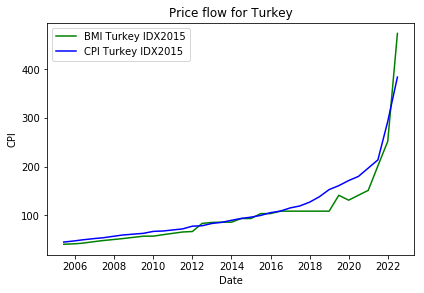

In [15]:
cpi_plot(df_cpi, 'Turkey')

In [16]:
df_cpi[df_cpi.name=="Turkey"]

,date,currency_code,name,local_price,CPI_IDX2015,local_avg2015,bmi_idx2015,diff_idx2015
196,2005-06-01,TRY,Turkey,4.00,44.83,9.92,40.34,-4.49
231,2006-01-01,TRY,Turkey,4.10,47.42,9.92,41.34,-6.08
269,2006-05-01,TRY,Turkey,4.20,49.20,9.92,42.35,-6.84
310,2007-01-01,TRY,Turkey,4.55,52.13,9.92,45.88,-6.25
351,2007-06-01,TRY,Turkey,4.75,53.61,9.92,47.90,-5.71
392,2008-06-01,TRY,Turkey,5.15,59.29,9.92,51.93,-7.36
433,2009-07-01,TRY,Turkey,5.65,62.85,9.92,56.97,-5.88
474,2010-01-01,TRY,Turkey,5.65,66.80,9.92,56.97,-9.82
515,2010-07-01,TRY,Turkey,5.95,67.61,9.92,60.00,-7.61
569,2011-07-01,TRY,Turkey,6.50,71.88,9.92,65.55,-6.33


**Mexico**

When looking at BMI vs. CPI for Mexico it is noticeable that the BMI is under the CPI for almost the entire period (except for the last 3 observations), which might indicate that Big Mac's are relatively low priced in Mexico, compared to other consumer goods there. However, when looking to the datapoints, it can be noted that there was a relatively large increase in price from 1-7-2014 to 1-1-2015 from 42 to 49MXN (~17%), while in the periods before the price was quite stable at 37MXN (and 32MXN before that). Meaning, that for this country setting the baseyear to 2015 has a huge impact on the BMI. While, since it is a nation-wide index, this is not an issue for the CPI.  

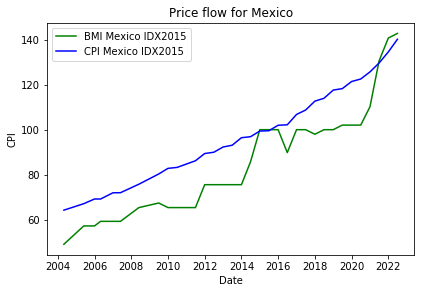

In [17]:
cpi_plot(df_cpi, 'Mexico')

In [18]:
df_cpi[df_cpi.name=="Mexico"]

,date,currency_code,name,local_price,CPI_IDX2015,local_avg2015,bmi_idx2015,diff_idx2015
139,2004-05-01,MXN,Mexico,24.00,64.16,49.00,48.98,-15.18
179,2005-06-01,MXN,Mexico,28.00,67.05,49.00,57.14,-9.91
218,2006-01-01,MXN,Mexico,28.00,69.14,49.00,57.14,-12.00
252,2006-05-01,MXN,Mexico,29.00,69.12,49.00,59.18,-9.94
293,2007-01-01,MXN,Mexico,29.00,71.89,49.00,59.18,-12.71
334,2007-06-01,MXN,Mexico,29.00,71.94,49.00,59.18,-12.76
375,2008-06-01,MXN,Mexico,32.00,75.72,49.00,65.31,-10.41
416,2009-07-01,MXN,Mexico,33.00,80.28,49.00,67.35,-12.93
457,2010-01-01,MXN,Mexico,32.00,82.77,49.00,65.31,-17.46
498,2010-07-01,MXN,Mexico,32.00,83.20,49.00,65.31,-17.89


# Outliers with relatively high BMI

On the other side of the spectrum we see more extreme outliers with relatively high BMI's compared to the CPI, namely Colombia and India.

**Colombia**

When looking at Colombia the conclusion can again be drawn that the choice for a baseyear of 2015 is influencing the BMI hugely. As the Big Mac price in Colombia even dropped for this year with respect to prior years, while after 2015 it started increasing again. On the other hand the CPI did not show a similar trend causing the BMI to be relatively high for Colombia with respect to the CPI.

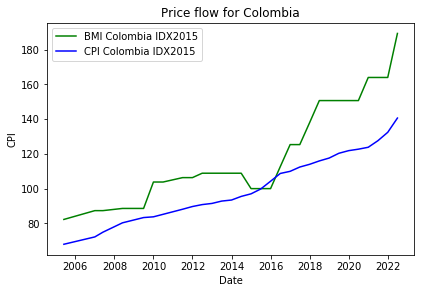

In [19]:
cpi_plot(df_cpi, 'Colombia')

In [20]:
df_cpi[df_cpi.name=="Colombia"]

,date,currency_code,name,local_price,CPI_IDX2015,local_avg2015,bmi_idx2015,diff_idx2015
168,2005-06-01,COP,Colombia,6500.00,68.00,7900.00,82.28,14.27
282,2007-01-01,COP,Colombia,6900.00,72.23,7900.00,87.34,15.11
323,2007-06-01,COP,Colombia,6900.00,74.95,7900.00,87.34,12.39
364,2008-06-01,COP,Colombia,7000.00,80.33,7900.00,88.61,8.28
404,2009-07-01,COP,Colombia,7000.00,83.36,7900.00,88.61,5.25
445,2010-01-01,COP,Colombia,8200.00,83.78,7900.00,103.80,20.02
486,2010-07-01,COP,Colombia,8200.00,85.23,7900.00,103.80,18.57
529,2011-07-01,COP,Colombia,8400.00,88.15,7900.00,106.33,18.18
584,2012-01-01,COP,Colombia,8400.00,89.70,7900.00,106.33,16.62
639,2012-07-01,COP,Colombia,8600.00,90.81,7900.00,108.86,18.05


**India**

For India we see one big leap in price just after the baseyear, where the Big Mac prices increased from 127 INR to 162 INR between 1-1-2016 and 1-7-2016 and just kept on increasing steadily after that. This big leap in price (especially compared to the baseyear) makes it look like Big Macs are extremely overpriced with respect to other consumer goods from then on.

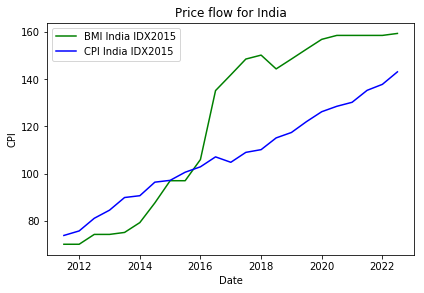

In [21]:
cpi_plot(df_cpi, 'India')

In [22]:
df_cpi[df_cpi.name=="India"]

,date,currency_code,name,local_price,CPI_IDX2015,local_avg2015,bmi_idx2015,diff_idx2015
542,2011-07-01,INR,India,84.00,73.83,119.83,70.10,-3.73
597,2012-01-01,INR,India,84.00,75.74,119.83,70.10,-5.64
651,2012-07-01,INR,India,89.00,81.10,119.83,74.27,-6.83
705,2013-01-01,INR,India,89.00,84.54,119.83,74.27,-10.27
760,2013-07-01,INR,India,90.00,89.89,119.83,75.10,-14.79
815,2014-01-01,INR,India,95.00,90.66,119.83,79.28,-11.38
871,2014-07-01,INR,India,105.00,96.40,119.83,87.62,-8.78
928,2015-01-01,INR,India,116.25,97.16,119.83,97.01,-0.15
984,2015-07-01,INR,India,116.25,100.61,119.83,97.01,-3.60
1040,2016-01-01,INR,India,127.00,102.90,119.83,105.98,3.08


# Full dataset BMI vs. CPI

When comparing the BMI and CPI for all countries combined over the entire window, there's a remarkable trend visible. Before the baseyear (2015) the average BMI is structurally lower for all countries, while afterwards it on average is higher. Which indicates that after 2015 the Big Mac prices increase faster, while before they seemed to be relatively cheap compared to other consumer goods.

Furthermore, when looking at the standard deviation of both the CPI and BMI it used to be structurally between 10-20%, but for the most recent time periods it suddenly increases to over 60 (!), meaning that the Big Mac prices have been shifting strongly for the past few years. Most of this could be related to the recent war in Ukraine and the Covid-19 Pandemic, which caused strong raises in energy-prices and production prices.

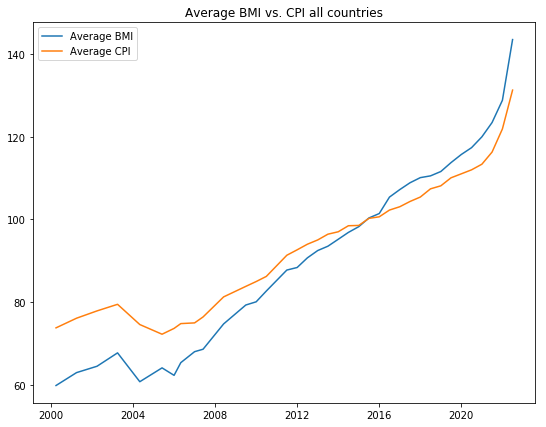

In [23]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df_cpi[['bmi_idx2015', 'CPI_IDX2015', 'date']].groupby('date').aggregate([np.mean])

fig, ax = plt.subplots(figsize=(9,7))
plt.title('Average BMI vs. CPI all countries')
plt.plot(df_grouped)
plt.legend(['Average BMI', 'Average CPI'])
plt.show()

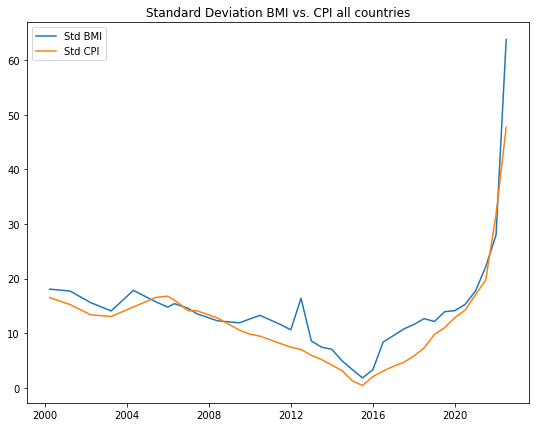

In [24]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df_cpi[['bmi_idx2015', 'CPI_IDX2015', 'date']].groupby('date').aggregate([np.std])

fig, ax = plt.subplots(figsize=(9,7))
plt.title('Standard Deviation BMI vs. CPI all countries')
plt.plot(df_grouped)
plt.legend(['Std BMI', 'Std CPI'])
plt.show()

# Conclusion

In general the BigMac-Index is nothing more than a fun way to compare price-levels between countries by comparing the price of a product that is known to almost everyone with respect to the exchange rates between currencies. Therefore, it does not really make sense to use the price as a exchange rate indicator, because there are way more factors involved than just the price of a single product.

However, it gives some insights in the purchasing power a country has, where it could be noted that countries like Norway and Switzerland had a relatively low purchasing power than the US, while countries like Azerbaijan and Romania had a relatively high purchasing power. Nevertheless, it should be noted that this only tells something about price-levels, while it does not take other metrics like average salary into account.

Furthermore, when comparing the price level of the country to the local big mac price, the conclusion could easily be drawn that it does not serve as a proper indicator for most countries, as it could be noted the determination of a baseyear had a huge effect on the comparison. In the end this makes sense, because the price of an individual good can be influenced way more on micro-economic decisions that for example the producer makes, while for nation-wide indicators does decisions play way less of a role.

In the end it is just a fun way to compare prices and get a bit of a feeling to what metrics like purchasing power really mean, than actual conclusions can or could be drawn from it